<a href="https://colab.research.google.com/github/rajeshrockzz/Colab_Files/blob/main/Demo_Predict_Employee_Attrition_using_Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Scenario:** Predict Employee Attrition using Classification Algorithms




Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

So, what is **Attrition**?
It is basically the turnover rate of employees in a particular organization

Reasons for **Attrition**:

- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

###**Problem Statement**
Uncover the factors that lead to employee attrition and explore the reasons as to why people are leaving the organization and predict whether an employee will leave the organization or not by creating a Web App using Streamlit that takes inputs from user's online





###**Dataset Description**
The data set contains the following attributes:

- **satisfaction_level** 
- **last_evaluation**
- **number_project**
- **average_montly_hours**
- **time_spend_company**
- **Work_accident**
- **quit**
- **promotion_last_5years**
- **department**
- **salary**

###**Tasks to be performed:**
- Import required libraries and load the data set from Dropbox
- Perform Exploratory Data Analysis (EDA) on the data set
  -  Generate a Data Report using Pandas Profiling and record your observations
  - Plot **Univariate Distributions**
    - What is the distribution of the average_montly_hours & average_montly_hours columns in the data set?
    - What's the Attrition percentage in the company?
    - Which Department of the company has the highest Attrition rate?
  - Plot **Bi-Variate Distributions**
    - How does salary affect the attrition rate?
    - Do experienced employees tend to leave the company if they are not satisfied?
    - Which department executes the most number of projects?
- Pre-process that data set for modeling
  - Handle Missing values present in the data set
  - Encode the categorical variables present
  - Split the data into training and testing set using sklearn's **train_test_split** function
- Modelling
  - Build and evaluate an Interactive **Decision Tree** Model
  - Build and evaluate an Interactive **Random Forest** Model
- Implement **GridSearchCV** & **RandomizedSearchCV**
- Interpret Employee Attrition Prediction Model With **SHAP**
- Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning 

  - Import PyCaret and load the data set
  - Initialize or setup the environment 
  - Compare Multiple Models and their Accuracy Metrics
  - Create the model
  - Tune the model
  - Evaluate the model
- Deploy the model using **Streamlit** using the model pickle file 

###**Installing Dependencies**

**Note:** After Insalling Pandas Profiling, restart the kernel and run from the top excluding the installation cell

- It's better to install all th libraries at the top

In [ ]:
#Intalling Pandas-Profiling

!pip install pandas-profiling==2.7.1 

In [ ]:
# Installing SHAP
!pip install shap

     |████████████████████████████████| 564 kB 31.3 MB/s 


In [ ]:
#Installing PyCaret

!pip install pycaret

     |████████████████████████████████| 288 kB 15.6 MB/s 
     |████████████████████████████████| 1.7 MB 46.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 45.5 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 167 kB 64.6 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 113 kB 23.6 MB/s 
     |████████████████████████████████| 6.8 MB 47.2 MB/s 
     |████████████████████████████████| 2.0 MB 12.0 MB/s 
     |████████████████████████████████| 261 kB 46.6 MB/s 
     |████████████████████████████████| 62 kB 361 kB/s 
     |████████████████████████████████| 675 kB 44.9 MB/s 
     |████████████████████████████████| 303 kB 51.0 MB/s 
     |██████████████████

###**Importing Required Libraries & Loading the Dataset**




[**Click Here**](https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv?dl=0) to download the dataset

In [ ]:
#Please run this cell in Google Colab to download the dataset

!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv

--2021-12-25 04:24:09--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2021-12-25 04:24:10--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0ad0f1d1a28ede787e408082ff.dl.dropboxusercontent.com/cd/0/inline/BceTO7G8_j7UONg0v31xsqaph_Ija0TcceKwtM24STgMdgTQmtY_g7wdWFr8QO_dEkNrlNzxm9xa2Sg29ptiYbKe129C6mb6YmiAXEiZcDNbXojsJ5gwEPKx6VNRA1r3R-_Orc-J1JKOjc1zgQslD3jq/file# [following]
--2021-12-25 04:24:10--  https://uc0ad0f1d1a28ede787e408082ff.dl.dropboxusercontent.com/cd/0/inline/BceTO7G8_j7UONg0v31xsqaph_Ija0TcceKwtM24STgMdgTQmtY_g7wdWFr8QO_dEkNrlNzxm9x

In [ ]:
  #Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set()


import warnings
warnings.filterwarnings("ignore")    
import os

print('Libraries Imported')

Libraries Imported


In [ ]:
#Loading the dataset

df = pd.read_csv('employee_data.csv')

df#Printing the first 5 rows of dataframe

satisfaction_level  last_evaluation  ...  department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]

###**Exploratory Data Analysis**

**Note:** If you want to learn more about Pandas-Profiling [**Click Here!**](https://pypi.org/project/pandas-profiling/)

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html') #Generating a Data Report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Generating a Pandas Profiling Report 

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Please refer to the HTML file created by the name of **output.html**

___
**Observations:**

- There are **10** variables or features in the dataframe and the total number of instances or rows are **14999**
- We have **5** Numeric, **3** Boolean, and **2** Categorical variables
- We have **2** Categorical Variables namely **Department** and **Salary**
- The **Salary** column is divided into **low**, **medium**, and **high** 
- There are no missing cells in the dataset which is a big relief
___

**Note:** Answer the following questions:

- Which columns are highly **skewed**?
- Which columns are highly **Kurtosis** driven?
- Which columns have Wrong data type?
- What columns seems to have **outliers** based on **min**, **max** and **percentile values**, **IQR range** along with the **standard deviation** and **mean absolute deviation**?
- What columns have missing values? (Check the **Missing Values** section in **Pandas Profiling**)
- What columns have high amount of zero/ infinite percentage and make sure that these zeroes/ infinite are supposed to be there

**For Example:** Weight cannot be zero/ infinite and any percentage of zero/ infinite in column zero is erroneous
- What columns have **high variance** and **standard deviation**?
- Comment on the distribution of the continuous values **(Real Number: ℝ≥0)**
- Do you see any alarming trends in the extreme values (minimum 5 and maximum 5)?
- How many booleans columns are there in the data set and out of those how many are imbalanced?
- Check for **duplicate records** across all columns (**Check Warning Section**)

**For Example:** Gender Male and Female in which Male is **95%** and Female is just **5%**
- How many columns are categorical?
  - Are those categories in sync with the domain categories?
  - Check if all the categories are unique and they represent distinct information
  - Is there any imbalance in the categorical columns?

Based on the above questions and your observations, chart out a plan for **Data Pre-processing** and feature engineering

**Note:** Feature Engineering (Feature Selection and Feature Creation)

- From the **Interaction Tab**, write at least 3 observations that may be very crucial for prediction. Make sure that they are in story format

**For Example:** Av monthly hours vs Satisfaction Level..

- Check **Pearson** and **Spearman** tab in the **correlation** section and note down the columns which are highly correlated (Postive and Negative Correlation). Create two bands of thresholds. (Consider 60 (0.6) to 80 (0.8) or 80 to 100 as high) 


####**Plotting Univariate Distributions**
A **Univariate distribution** is a probability distribution of only one random variable

**Note:** You have already seen this in Pandas Profiling. Still, if you want to write the code, you can do so.

What is the distribution of the **average_montly_hours** & **satisfaction_level** columns in the data set?


In [ ]:
import plotly.express as px
fig = px.histogram(df, x = 'average_montly_hours')
fig.show()

___
**Observations:**
- Most of the employees work between 125 and 265 hours monthly
- Very few employees spend less than 140 and more than 265 working on a monthly basis
___

In [ ]:
fig = px.histogram(df, x = 'satisfaction_level')
fig.show()

___
**Observations:**
- More than 800 employees are not satasfied with their work and may leave the company
- Most of the employees are quite content with their job
___

**What's the Attrition percentage in the company?**


In [ ]:
plt.figure(figsize=(12,8))

ax = sns.countplot(df["quit"], color='green')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    
    y = p.get_bbox().get_points()[1,1]
    
    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()
fig.show()

___
**Observations:**
- 76% of employees did not leave the organization while 24% did leave
___

**Which Department of the company has the highest Attrition rate?**

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['department'],hue="quit")

plt.xlabel('Departments')
plt.ylabel('Frequency')
plt.show()
fig.show()

___
**Observations:**
- **Sales** department has the highest attrition or turnover rate followed by **technical**, and **support** departments
- **Management** recorded the lowest number of employees leaving the company
___

####**Bi-variate Distributions**
- A Bi-variate distribution is a distribution of two random variables
- The concept generalizes to any number of random variables, giving a **Multivariate Distribution**

**How does salary affect the attrition rate?**

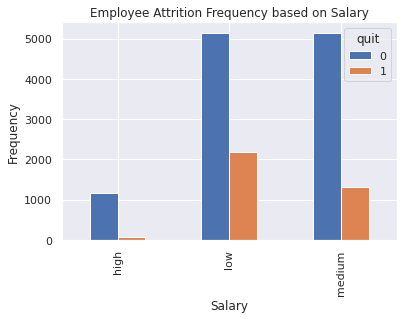

In [ ]:
df_new = pd.crosstab(df['salary'], df['quit'])

df_new.plot(kind = 'bar')

plt.title('Employee Attrition Frequency based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()


___
**Observations:**

- People with **low** salary are more likely to quit as compared to people with **medium** and **high** salaries
- People with **high** salary are very less likely to leave the organization
- Salary seems to be a significant factor in determining the turnover rate in employees
___

**Do experienced employees tend to leave the company if they are not satisfied?**

In [ ]:
px.scatter(df, x=df['satisfaction_level'],y=df['time_spend_company'],color=df['quit'])

**Which department executes the most number of projects?**

In [ ]:
fig = px.box(df, x="department",y="number_project")
fig.show()

###**Create Training and Testing Set**

In [ ]:
X = df.drop('quit', axis = 1)
y = df.quit

In [ ]:
y.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: quit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size=0.2) #, stratify = y)

In [ ]:
y_train.value_counts(normalize=True)

0    0.76348
1    0.23652
Name: quit, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.755667
1    0.244333
Name: quit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size=0.2, stratify = y)
y_test.value_counts(normalize=True)

0    0.762
1    0.238
Name: quit, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

0    0.761897
1    0.238103
Name: quit, dtype: float64

###**Data Pre-processing**

####**Encode Categorical Variables**

The dataset contains **2** Categorical Variables:

- **department**
- **salary**

We have to encode them before modelling because scikit learn doesn't accept string data as input

In [ ]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_train[vars], prefix=vars)
  X_train = X_train.join(cat_list)

In [ ]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_test[vars], prefix=vars)
  X_test = X_test.join(cat_list)

In [ ]:
#Let us drop the department and salary columns

X_train.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_train.shape

(11999, 20)

In [ ]:
X_test.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_test.shape

(3000, 20)

###**Build an Interactive Decision Tree Model**

[**Click Here!**](https://ipywidgets.readthedocs.io/en/latest/) to learn more about **ipywidgets**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [ ]:
@interact #To convert any function into an inteactive one just write "@interact" immediately before the function definition

def plot_tree(
    crit = ['gini', 'entropy'],
    split = ['best','random'],
    depth = IntSlider(min = 1, max = 25, value =2, continuous_update = False),
    min_split = IntSlider(min = 1, max = 5, value =2, continuous_update = False),
    #min_split is the minimum number of samples  required to split an internal node in our decision tree
    min_leaf = IntSlider(min = 1, max = 5, value =1, continuous_update = False)):
  
  estimator = DecisionTreeClassifier(criterion=crit,
                                     splitter=split,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf
                                     )
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Decision Tree Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Decision Tree Training Accuracy',a, 'Decision Tree Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Split:', split,'\n', 'Depth:', depth,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')

  #Let us use GraphViz to export the model and display it as an image on the screen
  graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                      feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'],
                                      filled = True))
  
  display(Image(data=graph.pipe(format = 'png')))
  

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Decision Tree:

**Advantages:**
- Interpretable and easy to understand
- Can Handle Missing Values
- Feature Selection happens automatically


**Disadvantages:**
- Prone to overfitting
- Tends to add High Variance which means they tend to overfit
- Small changes in data greatly affect prediction
 



**One problem with Decision Tree is that they have Low Bias and High Variance which means they are prone to overfitting on the training set**



Now, let us see what **Underfit**, **Goodfit**, and **Overfit** is:

- **Underfit**
  - Model has not learned anything
  - **Training Accuracy**: **54%**
  - **Testing Accuracy**: **49%**

- **Overfit**
  - Model has memorized everything
  - **Training Accuracy**: **99%**
  - **Testing Accuracy**: **46%**

- **Goodfit**
  - Model has performed well on the testing data as well alongwith the training data 
  - **Training Accuracy**: **93%**
  - **Testing Accuracy**: **91%**



Now, let's use a Random Forest Classifier to overcome the variance problem to get a better generalizable result

###**Build an Interactive Random Forest Model**

In [ ]:
@interact
def plot_tree_rf(crit= ['gini','entropy'],
                 bootstrap= ['True', 'False'],
                 depth=IntSlider(min= 1 ,max= 20,value=3, continuous_update=False),
                 forests=IntSlider(min= 1,max= 1000,value= 100,continuous_update=False),
                 min_split=IntSlider(min= 2,max= 5,value= 2, continuous_update=False),
                 min_leaf=IntSlider(min= 1,max= 5,value= 1, continuous_update=False)):
  
  estimator = RandomForestClassifier(
      random_state = 1,
      criterion = crit,
      bootstrap = bootstrap,
      n_estimators = forests,
      max_depth = depth, 
      min_samples_split = min_split,
      min_samples_leaf = min_leaf,
      n_jobs = -1,
      verbose = False)
  
  estimator.fit(X_train, y_train)

  print('Random Forest Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Random Forest Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))  

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Random Forest Training Accuracy',a, 'Random Forest Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Bootstrap:', bootstrap,'\n', 'Depth:', depth,'\n', 'forests:', forests,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Random Forest:

**Advantages:**
- Not prone overfitting
- Runs efficiently huge data sets
- Gives better accuracy than other classification algorithms

**Disadvantages:**
- Computationally Slower
- Found to be biased while dealing with categorical variables
- Although much lower than decision trees, overfitting is still a risk with random forests



###**Implement GridSearchCV and RandomizedSearchCV Model**

**GridSearchCV**

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.973


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
gd_roc=roc_auc_score(y_test, pred)
gd_acc = accuracy_score(y_test, pred)
gd_prec = precision_score(y_test, pred)
gd_rec = recall_score(y_test, pred)
gd_f1 = f1_score(y_test, pred)

**RandomizedSearchCV**

In [ ]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
#Base Model
rfc=RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, bootstrap = False,
 max_depth = 70,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators= 1600)


In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=1600, random_state=42)

In [ ]:
pred=rfc1.predict(X_test)

###**Model Evaluation**

**Accuracy:** No. of correct predictions made by the model over all kinds predictions made

**When to use Accuracy:**

Accuracy is a good measure when the target variable classes in the data are nearly balanced. For example, No. of people who Survived Titanic (60% yes - 40% no)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  0.9893333333333333


**Confusion Matrix:**
 Gives the Performance of a classification model on a set of test data for which the true values are known.

A way to visualize **Precision** and **Recall**

**When to use Confusion Matrix:** When we have an Imbalanced Classification Task



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[2279,    7],
       [  25,  689]])

- **Precision:**
  - What percebtage of positive predictions made were correct? This is **Precision**
  - No. of True Positives divided by the no. of True Positives plus the No. of False Positives
 
- **Recall:** Ratio of True Positives to all the positives in your Dataset

- **When to use Precision & Recall:** 
 - In the credit card fraud detection task, lets say we modify the model slightly, and identify a single transaction correctly as fraud. 

 - Now, our precision will be 1.0 (no false positives) but our recall will be very low because we will still have many false negatives. 

 - If we go to the other extreme and classify all transactions as fraud, we will have a recall of 1.0 — we’ll catch every fraud transaction — but our precision will be very low and we’ll misclassify many legit transactions. In other words, as we increase precision we decrease recall and vice-versa.

- **F1-Score:**
 F1 Score is the weighted average of Precision and Recall. F1 is usually more useful than accuracy, especially when we have an uneven class distribution

 - **When to use F1-Score:** 
   - Useful when you have data with imbalance classes
   - Let us say, we have a model with a precision of 1, and recall of 0 which gives a simple average as 0.5 and an F1 score of 0
   - If one of the parameters is low, the second one no longer matters in the F1 score 
   - The F1 score favors classifiers that have similar precision and recall
   - F1 score is a better measure to use if you are seeking a balance between Precision and Recall


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

results = pd.DataFrame([['RandomizedSearchCV', acc,prec,rec, f1,roc], 
                        ['GridSearchCV',gd_acc, gd_prec, gd_rec, gd_f1, gd_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

Model  Accuracy  Precision    Recall  F1 Score       ROC
0  RandomizedSearchCV  0.989333   0.989943  0.964986  0.977305  0.980962
1        GridSearchCV  0.973000   0.984686  0.900560  0.940746  0.948093

**Saving the model and dumping it to a pickle file**

In [ ]:
import pickle 

filename = 'final_model.sav'
pickle.dump(rfc1, open(filename, 'wb'))
 

###**Interpreting Employee Attrition Prediction With SHAP**


**SHAP** (SHapley Additive exPlanations) :break down a prediction to show the impact of each feature

**Install SHAP**: pip install shap

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 5.7MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463907 sha256=3240e99ad03c3a49007fdfe37a256499fbd522434bc8f3913e19f7344b4d81bc
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import shap

**shap.summary_plot function**

- Produces the variable importance plot
- A variable importance plot lists the most significant variables in descending order
- The top variables contribute more to the model than the bottom ones and thus have high predictive power

In [ ]:

shap_values = shap.TreeExplainer(rfc1).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Dependency Plot**

- Shows the effect a single feature has on the prediction
- How much the prediction depends on a particular feature
- shap.dependence_plot(indexoffeature,matrix_shap_values,dataset_matrix)

In [ ]:
shap.dependence_plot('satisfaction', shap_values, X_train)

###**PyCaret**


Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning

**NOTE:** It is alwasy used in Industry as a Directional Tool

**PyCaret** is an open source, low-code machine learning library in **Python** that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment

[**Click Here!**](https://pycaret.org/) to learn more about **PyCaret**

**Installing PyCaret**

- !pip install pycaret

####**Tasks to be performed**

- Import PyCaret and load the data set
- Initialize or setup the environment 
- Compare Multiple Models and their Accuracy Metrics
- Create the model
- Tune the model
- Evaluate the model


####**Import PyCaret and load the data set**

In [ ]:
!pip install pycaret

In [ ]:
import pycaret.classification as pc
#dir(pc)

In [ ]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('/content/employee_data.csv?dl=0')

df.head() #Printing the first 5 rows of dataframe

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  quit  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [ ]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

####**Initialize or setup the environment**

In [ ]:
pc.setup(df, target='quit')

___
**Observations:**
- The target type (Serial No. 2) is **Binary** because we have two values in **quit** column i.e., **0** and **1**
- The data contains **3** Numeric Features and **6** Categorical Features
___

####**Compare Multiple Models and their Accuracy Metrics**

In [ ]:
pc.compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9896  0.9929  0.9656  0.9916   
xgboost         Extreme Gradient Boosting    0.9871  0.9929  0.9613  0.9856   
lightgbm  Light Gradient Boosting Machine    0.9860  0.9939  0.9546  0.9875   
et                 Extra Trees Classifier    0.9839  0.9908  0.9601  0.9735   
catboost              CatBoost Classifier    0.9834  0.9933  0.9468  0.9846   
gbc          Gradient Boosting Classifier    0.9762  0.9873  0.9252  0.9759   
dt               Decision Tree Classifier    0.9759  0.9731  0.9675  0.9360   
ada                  Ada Boost Classifier    0.9586  0.9829  0.9100  0.9192   
knn                K Neighbors Classifier    0.9339  0.9697  0.9022  0.8389   
lr                    Logistic Regression    0.9024  0.9382  0.8211  0.7872   
ridge                    Ridge Classifier    0.8842  0.0000  0.8274  0.7321   
lda          Linear Discriminant Analysis    0.8820  0.9298  0.8501  0.7176   
svm                   SVM - Linear Kernel    0.8148  0.0000  0.6402  0.6890   
nb                            Naive Bayes    0.7122  0.9144  0.9425  0.4561   
qda       Quadratic Discriminant Analysis    0.5104  0.5482  0.6219  0.2798   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9784  0.9716  0.9717     0.924  
xgboost   0.9732  0.9648  0.9649     1.488  
lightgbm  0.9707  0.9615  0.9618     0.173  
et        0.9667  0.9561  0.9562     0.883  
catboost  0.9653  0.9544  0.9548     4.568  
gbc       0.9498  0.9342  0.9349     0.936  
dt        0.9514  0.9354  0.9357     0.062  
ada       0.9145  0.8872  0.8872     0.370  
knn       0.8692  0.8251  0.8262     0.183  
lr        0.8037  0.7388  0.7391     0.897  
ridge     0.7767  0.6989  0.7014     0.035  
lda       0.7782  0.6986  0.7033     0.079  
svm       0.5827  0.4894  0.5244     0.159  
nb        0.6146  0.4264  0.4984     0.036  
qda       0.3824  0.0713  0.0848     0.048

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2479, verbose=0,
                       warm_start=False)

**Note:** Don't worry about the models. You are gonna learn most of them in the coming modules

####**Create the Model**



In [ ]:
rf_model = pc.create_model('rf') #Performs K-Fold (10) CV for the selected model

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9924  0.9969  0.9804  0.9881  0.9843  0.9792  0.9792
1       0.9933  0.9947  0.9765  0.9960  0.9861  0.9818  0.9818
2       0.9895  0.9933  0.9608  0.9959  0.9780  0.9712  0.9714
3       0.9876  0.9876  0.9529  0.9959  0.9739  0.9658  0.9662
4       0.9886  0.9903  0.9648  0.9880  0.9763  0.9688  0.9689
5       0.9895  0.9889  0.9609  0.9960  0.9781  0.9712  0.9715
6       0.9886  0.9941  0.9570  0.9959  0.9761  0.9686  0.9689
7       0.9886  0.9963  0.9648  0.9880  0.9763  0.9688  0.9689
8       0.9876  0.9924  0.9688  0.9802  0.9745  0.9663  0.9663
9       0.9905  0.9948  0.9686  0.9920  0.9802  0.9739  0.9740
Mean    0.9896  0.9929  0.9656  0.9916  0.9784  0.9716  0.9717
SD      0.0018  0.0029  0.0080  0.0051  0.0038  0.0050  0.0050

####**Tune the Model**

In [ ]:
tuned_rf = pc.tune_model(rf_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9733  0.9917  0.9176  0.9710  0.9435  0.9261  0.9267
1       0.9762  0.9926  0.9294  0.9713  0.9499  0.9343  0.9347
2       0.9733  0.9875  0.9137  0.9749  0.9433  0.9259  0.9267
3       0.9762  0.9859  0.9176  0.9832  0.9493  0.9338  0.9347
4       0.9800  0.9883  0.9375  0.9796  0.9581  0.9450  0.9454
5       0.9724  0.9849  0.9180  0.9671  0.9419  0.9238  0.9243
6       0.9810  0.9920  0.9336  0.9876  0.9598  0.9474  0.9480
7       0.9733  0.9954  0.9219  0.9672  0.9440  0.9265  0.9270
8       0.9752  0.9896  0.9453  0.9528  0.9490  0.9327  0.9327
9       0.9857  0.9938  0.9490  0.9918  0.9699  0.9606  0.9610
Mean    0.9767  0.9902  0.9284  0.9746  0.9509  0.9356  0.9361
SD      0.0041  0.0033  0.0119  0.0108  0.0086  0.0113  0.0112

In [ ]:
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2479, verbose=0,
                       warm_start=False)


In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=2479, verbose=0, warm_start=False)


See the difference between the original model (**rf_model**) and the tuned model (**tuned_rf**)

####**Evaluate the Model**

In [ ]:
tuned_rf_eval = pc.evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

###**Deploying the Model Using Streamlit**

Go to your local system and use a text editor such as **Sublime Text** to deploy your app using the pickle file genereated

- **Save the next cell as a .py file**
- **Run it in your local system** (streamlit run filename.py)

In [ ]:
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

#Loading Trained Model
model = load_model('Final_model')


def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    #predict_model function takes a trained model object and the dataset to predict
    
    predictions = predictions_df['Label'][0]
    return predictions


st.title('Employee Attrition Prediction Web App')

satisfaction_level=st.number_input('satisfaction_level' , min_value=0.1, max_value=1.0, value=0.1)
last_evaluation =st.number_input('last_evaluation',min_value=0.1, max_value=1.0, value=0.1)
number_project = st.number_input('number_project', min_value=0, max_value=50, value=5)
time_spend_company = st.number_input('time_spend_company', min_value=1, max_value=10, value=3)
Work_accident = st.number_input('Work_accident',  min_value=0, max_value=50, value=0)
promotion_last_5years = st.number_input('promotion_last_5years',  min_value=0, max_value=50, value=0)
salary = st.selectbox('salary', ['low', 'high','medium'])
average_montly_hours = st.number_input('average_montly_hours',  min_value=96, max_value=310, value=100)
department = st.selectbox('department', ['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'])


output=""

input_dict={'satisfaction_level':satisfaction_level,'last_evaluation':last_evaluation,'number_project':number_project,'time_spend_company':time_spend_company,'Work_accident': Work_accident,'promotion_last_5years':promotion_last_5years,'salary' : salary, 'average_montly_hours':average_montly_hours, 'department':department}


input_df = pd.DataFrame([input_dict])
print(input_df)

if st.button("Predict"):
	output = predict(model=model, input_df=input_df)
	output = str(output)
        
if output=='1':
	st.success('Employee will leave the company')
else:
	st.success('Employee will stay')